In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from pathlib import Path
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split

sns.set_palette("pastel", 9)
#husl

In [58]:
df_train = pd.read_csv(Path("adults_data","adults_cleaned_train_data.csv"))
df_test = pd.read_csv(Path("adults_data","adults_cleaned_test_data.csv"))

In [59]:
def count_sth_grouped(data, value_up, column, compare_column, title,
                      relation='equal', value_down=None, ax=None, rotat=60,
                      hue_col=None):
    
    if hue_col is None:
        data = data[[column, compare_column]]
    else:
        data = data[[column, compare_column, hue_col]]
    
    if relation == 'equal':
        df_reduced = data[data[column] == value_up]
    if relation == 'lower':
        df_reduced = data[data[column] <= value_up]
    if relation == 'greater':
        df_reduced = data[data[column] >= value_up]
    if relation == 'between':
        df_reduced = data[(data[column] <= value_up) & (data[column] > value_down)]
    
        
    
    if hue_col is None:
        df_reduced = df_reduced.groupby([compare_column]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
                               errorbar=None, palette="Greens")
    else:
        df_reduced = df_reduced.groupby([compare_column, hue_col]).count()
        df_reduced = df_reduced.reset_index()
        cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, hue=hue_col, ax=ax,
                               errorbar=None, palette="Greens")
        
    for p in cnt_plot.patches:
        if p.get_height() != 0:  
            cnt_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
    
    #cnt_plot.set_xticks(range(len(df_reduced[compare_column])))
    #cnt_plot.set_xticklabels(df_reduced[compare_column], rotation=rotat)

    cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
    cnt_plot.set_ylabel("count")
    cnt_plot.set_title(title) #wroc
    plt.tight_layout()

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


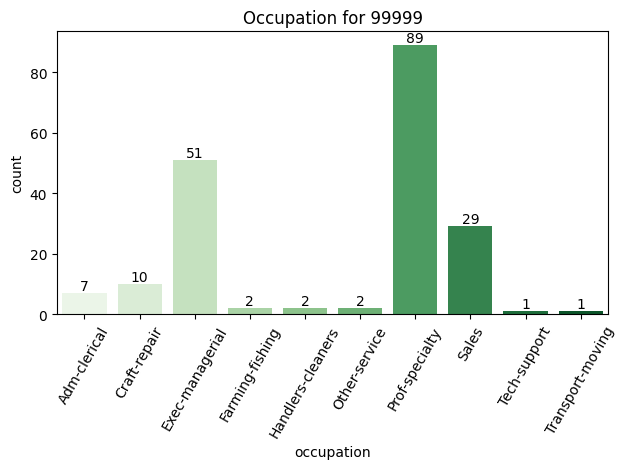

In [60]:
count_sth_grouped(df_train, 99999, 'capital', 'occupation', "Occupation for 99999",
                  relation = 'equal')

# high / low amount of time spent at work

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


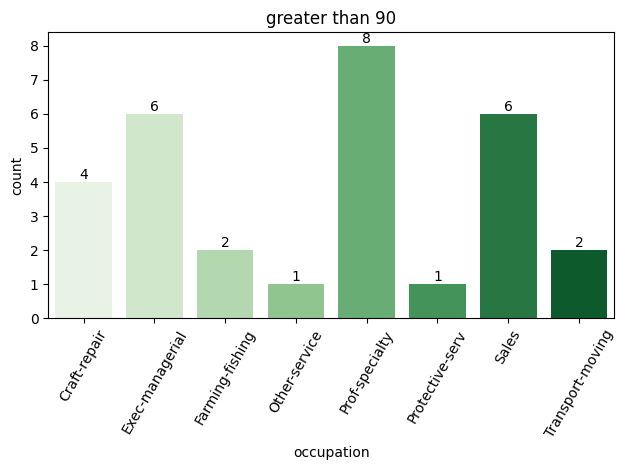

In [61]:
count_sth_grouped(df_train, 90, 'hours-per-week', 'occupation', 'greater than 90')

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)


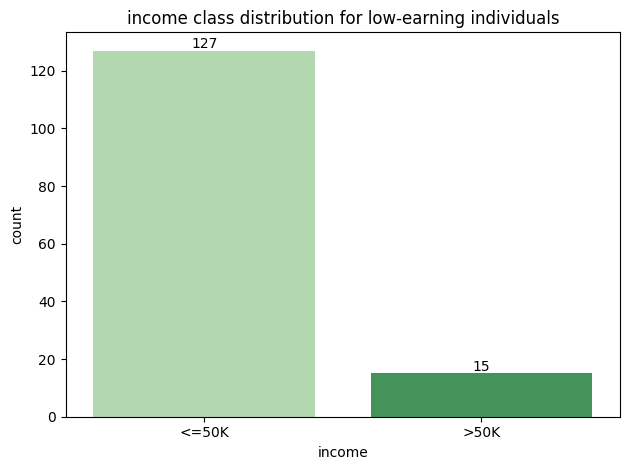

In [62]:
count_sth_grouped(df_train, 5, 'hours-per-week', 'income', 
                  "income class distribution for low-earning individuals",
                  'lower', rotat=0) 
## ile osób było w poszczególnej grupie dla ludzi
##pracujących mniej niż 5h

In [63]:
def draw_subplots_high(data, compare_column, rotat_value, hue_col=None, 
                       horiz_space=1, sub_hight=8):

    fig, axes = plt.subplots(2,2, figsize=(16,sub_hight))

    plt.suptitle("Suspiciously high values of working hours", fontweight = "bold")

    count_sth_grouped(data, 100, 'hours-per-week', compare_column, "96-100",
                    'between', 95, ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 95, 'hours-per-week', compare_column, "91-95",
                    'between', 90, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 90, 'hours-per-week', compare_column, "81-90",
                    'between', 80, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 80, 'hours-per-week', compare_column, "71-80",
                    'between', 70, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_tickla

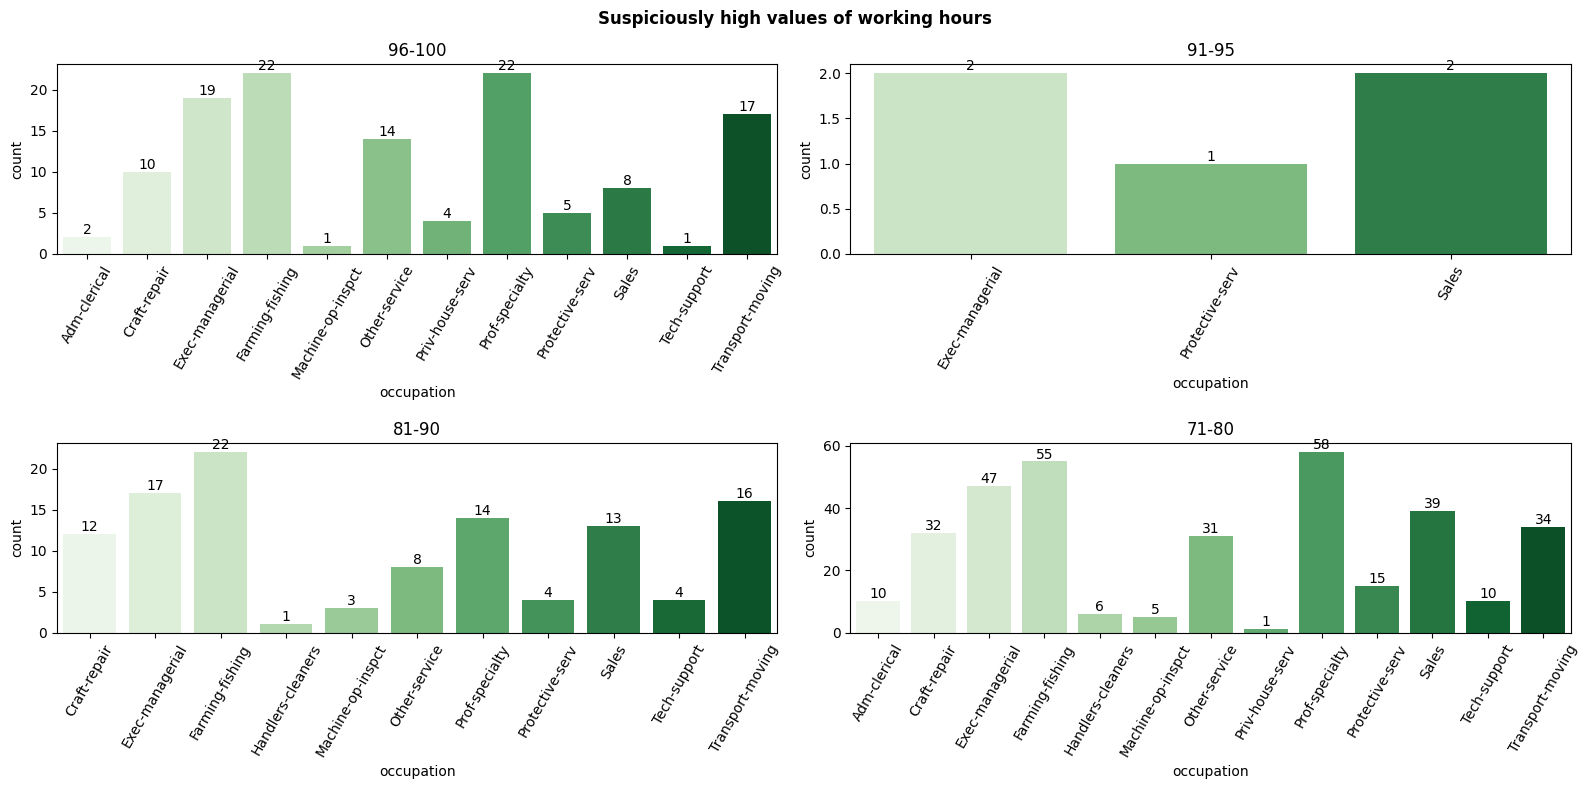

In [64]:
draw_subplots_high(df_train, "occupation",60)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_tickla

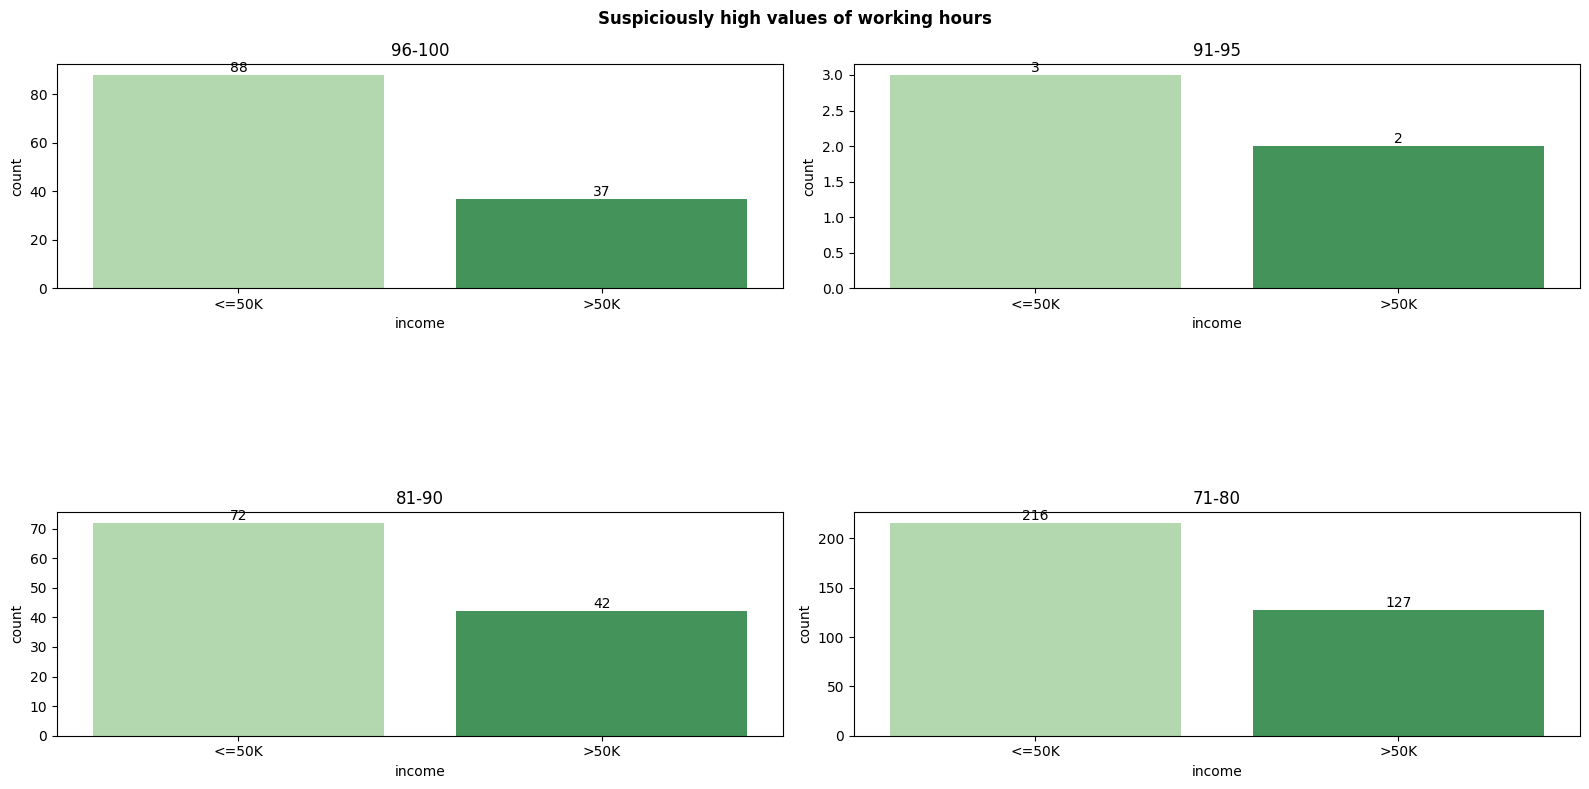

In [65]:
draw_subplots_high(df_train,"income", 0)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

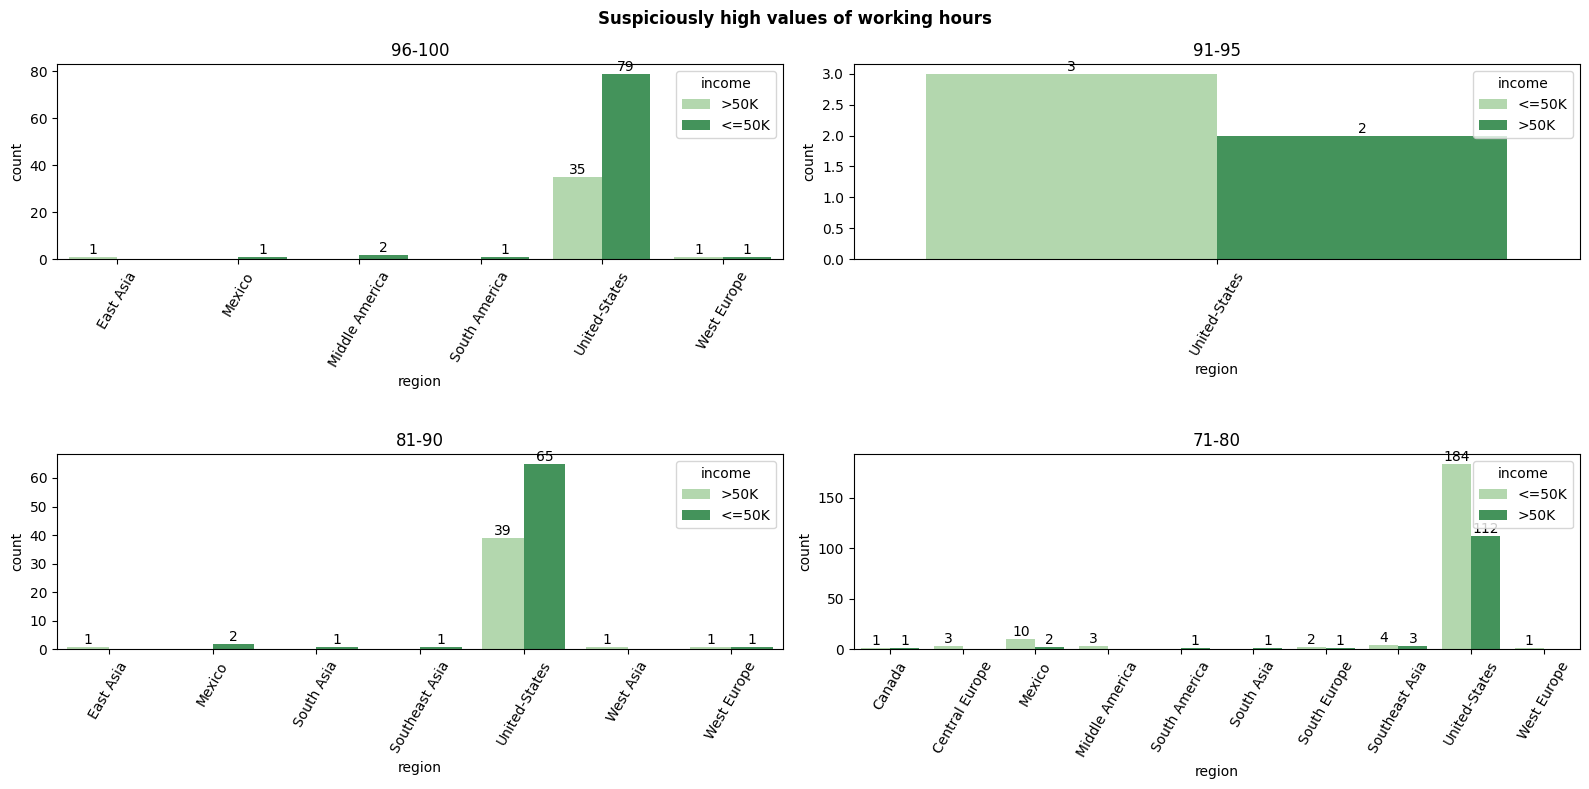

In [66]:
draw_subplots_high(df_train,'region',60, hue_col="income") #wroc

In [67]:
def draw_subplots_low(data, compare_column, rotat_value, hue_col=None,
                      horiz_space=1, sub_height=13):

    fig, axes = plt.subplots(3,2, figsize=(12,sub_height))

    plt.suptitle("Suspiciously low values of working hours", fontweight = "bold")

    count_sth_grouped(data, 5, 'hours-per-week', compare_column, "0-5",
                    'between', -1, ax=axes[0,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 10, 'hours-per-week', compare_column, "6-10",
                    'between', 5, ax=axes[0,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 15, 'hours-per-week', compare_column, "11-15",
                    'between', 10, ax=axes[1,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 25, 'hours-per-week', compare_column, "16-25",
                    'between', 15, ax=axes[1,1], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 0, 'hours-per-week', compare_column, "0",
                    'equal',ax=axes[2,0], rotat=rotat_value, hue_col=hue_col)

    count_sth_grouped(data, 1, 'hours-per-week', compare_column, "1",
                    'equal',ax=axes[2,1], rotat=rotat_value, hue_col=hue_col)

    plt.subplots_adjust(hspace=horiz_space)

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_p

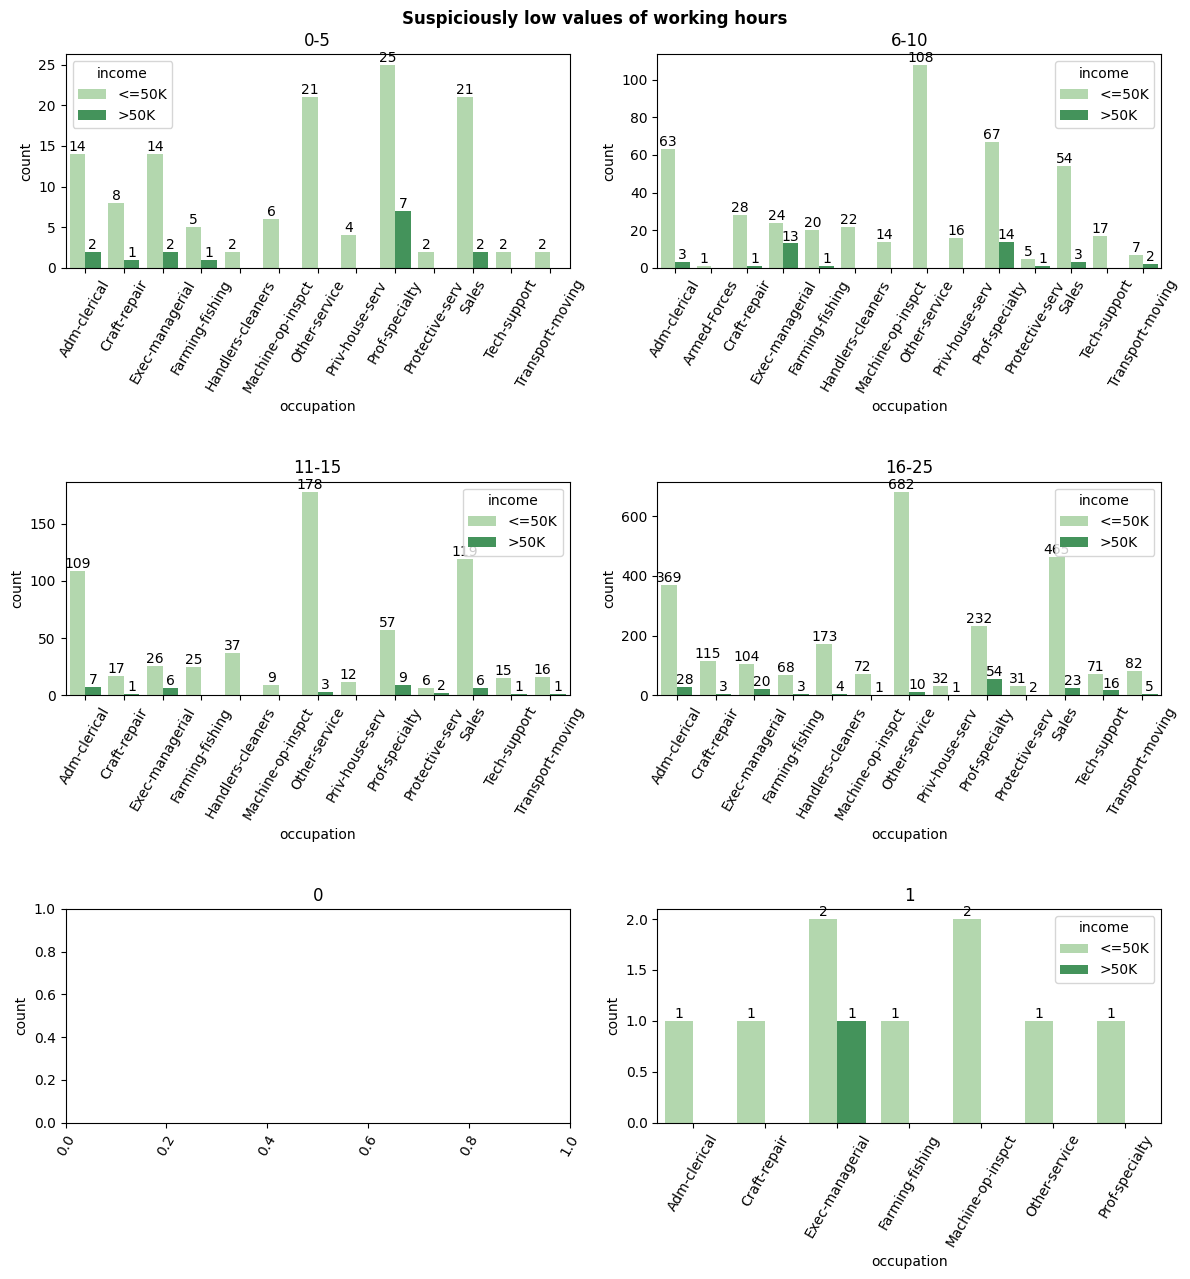

In [68]:
draw_subplots_low(df_train, "occupation",60, hue_col="income")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cnt_plot.set_xticklabels(cnt_plot.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cnt_plot = sns.barplot(df_reduced, x=compare_column, y=column, ax=ax,
C:\Users\wypyc\AppData\Local\Temp\ipykernel_14804\141896434.py:41: UserWarning: set_tickla

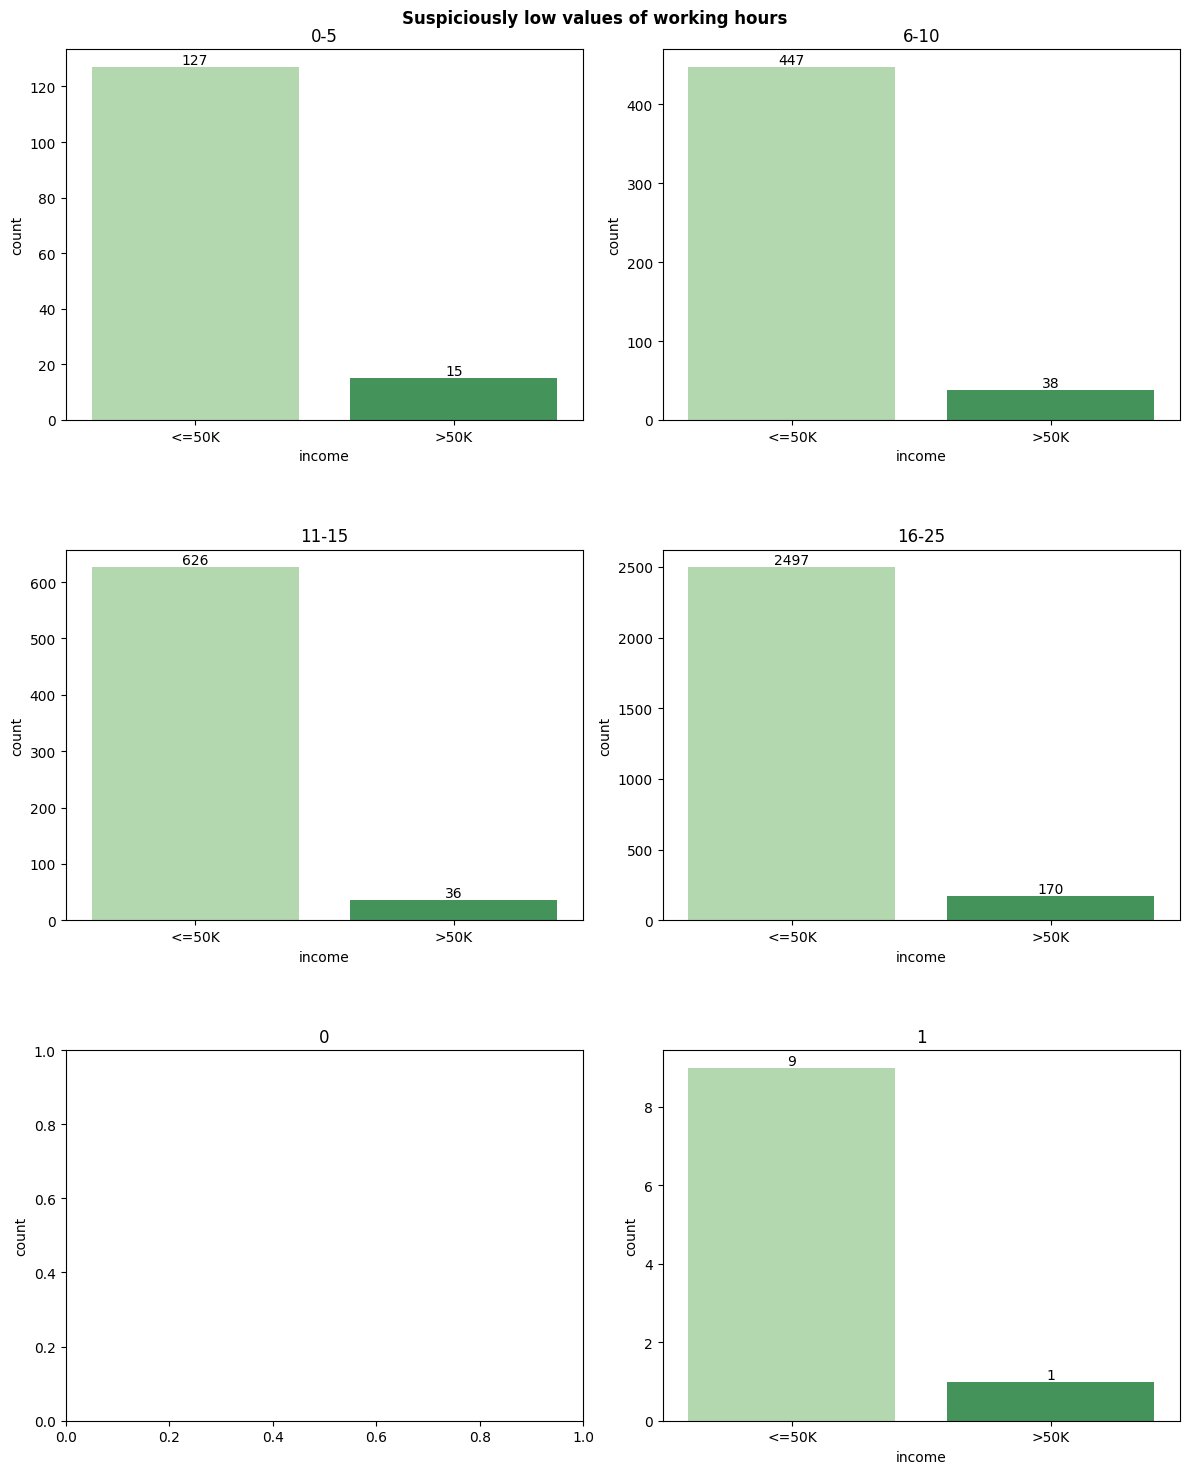

In [69]:
draw_subplots_low(df_train, "income",0, horiz_space=0.35, sub_height=15)